<a href="https://colab.research.google.com/github/Athallakarenza/Heart-Attack-Prediction-using-Deep-Learning/blob/main/SainsDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset & Library

In [ ]:
!gdown 11_WMI8Ej7HgY9SWNDgWoRs_M59S5q94p

Downloading...
From: https://drive.google.com/uc?id=11_WMI8Ej7HgY9SWNDgWoRs_M59S5q94p
To: /content/heart_disease.csv
100% 48.4k/48.4k [00:00<00:00, 5.24MB/s]


Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
import sklearn


In [ ]:
data = pd.read_csv('/content/heart_disease.csv')

# Pre-processing

###Analisis Data

**Data**

1.age: The person's age in years

2.sex: The person's sex

3.cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia ( 1 = normal; 2 = fixed defect; 3 = reversable defect)

14.target: Heart disease

In [ ]:
print('Cuplikan Data')
data

Cuplikan Data


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
0,0,52,Male,0,125,212,No,1,168,0,1.0,2,2,3,No
1,1,53,Male,0,140,203,Yes,0,155,1,3.1,0,0,3,No
2,2,70,Male,0,145,174,No,1,125,1,2.6,0,0,3,No
3,3,61,Male,0,148,203,No,1,161,0,0.0,2,1,3,No
4,4,62,Female,0,138,294,Yes,1,106,0,1.9,1,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,59,Male,1,140,221,No,1,164,1,0.0,2,0,2,Yes
1021,1021,60,Male,0,125,258,No,0,141,1,2.8,1,1,3,No
1022,1022,47,Male,0,110,275,No,0,118,1,1.0,1,1,2,No
1023,1023,50,Female,0,110,254,No,0,159,0,0.0,2,0,2,Yes


Pelabelan Data Kategorik

In [ ]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

In [ ]:
print( 'Shape of DataFrame: {}'.format(data.shape))
print(data.info())

Shape of DataFrame: (1025, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     1025 non-null   int64   
 1   age            1025 non-null   int64   
 2   sex            1025 non-null   category
 3   cp             1025 non-null   int64   
 4   trestbps       1025 non-null   int64   
 5   chol           1025 non-null   int64   
 6   fbs            1025 non-null   category
 7   restecg        1025 non-null   int64   
 8   thalach        1025 non-null   int64   
 9   exang          1025 non-null   int64   
 10  oldpeak        1025 non-null   float64 
 11  slope          1025 non-null   int64   
 12  ca             1025 non-null   int64   
 13  thal           1025 non-null   int64   
 14  Heart_Disease  1025 non-null   category
dtypes: category(3), float64(1), int64(11)
memory usage: 99.6 KB
None


**Tipe Data**
1. age - numerik
2. sex - nominal
3. cp -  nominal
4. trestbps - numerik
5. chol - numerik
6. fbs - biner
7. restecg - nominal
8. thalach - numerik
9. exang - biner
10. oldpeak - numerik
11. slope - nominal
12. ca - ordinal
13. thal - nominal
14. output - biner

In [ ]:
data.describe()

,Unnamed: 0,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,512.000000,54.434146,0.942439,131.611707,246.00000,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,296.036315,9.072290,1.029641,17.516718,51.59251,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,0.000000,29.000000,0.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,256.000000,48.000000,0.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,512.000000,56.000000,1.000000,130.000000,240.00000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,768.000000,61.000000,2.000000,140.000000,275.00000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,1024.000000,77.000000,3.000000,200.000000,564.00000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


###Data Cleaning

In [ ]:
print('Pengecekan Missing Value')
data.isna().sum()

Pengecekan Missing Value


,0
Unnamed: 0,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [ ]:
print('Pengecekan Duplikat')
data[data.duplicated()]

Pengecekan Duplikat


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease


Encoding Categorical Column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'sex' column
sex_label_encoder = LabelEncoder()
data['sex'] = sex_label_encoder.fit_transform(data['sex'])

# Encoding 'Heart_Disease' column
heart_disease_label_encoder = LabelEncoder()
data['Heart_Disease'] = heart_disease_label_encoder.fit_transform(data['Heart_Disease'])

fbs_label_encoder = LabelEncoder()
data['fbs'] = fbs_label_encoder.fit_transform(data['fbs'])


###Pengecekan Outlier
Akan dilakukan pengecekan

Outliers untuk data bertipe numerik: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


Unique Attribut untuk kolom bertipe ordinal dan nominal: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [ ]:
data.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Heart_Disease'],
      dtype='object')

**Outlier Check**

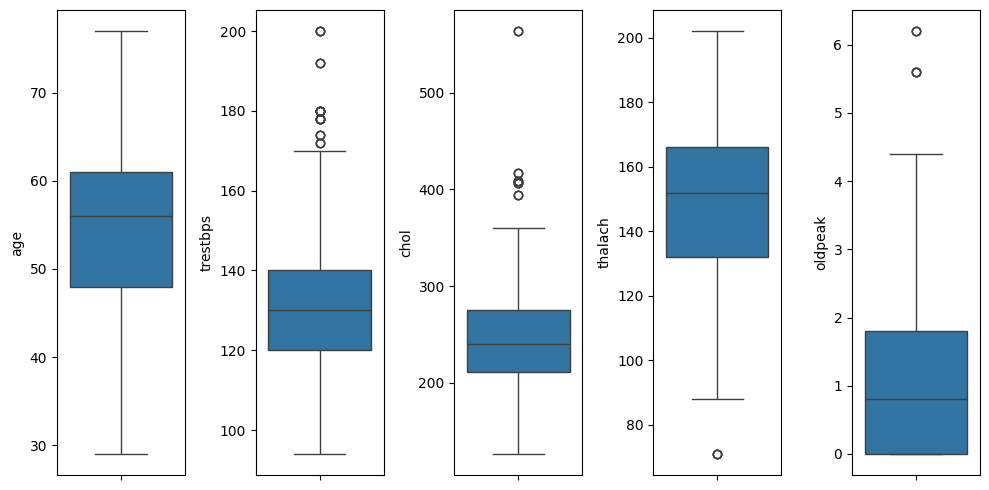

In [ ]:
#mendeteksi outliers
data_outliers = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(data_outliers)):
    plt.subplot(1,len(data_outliers),i+1)
    sns.boxplot(y=data[data_outliers[i]])
    plt.tight_layout()

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect and drop outliers for each specified column
for col in data_outliers:
    outliers = detect_outliers(data, col)
    if not outliers.empty:
        data = data.drop(outliers.index)
for col in data_outliers:
    outliers = detect_outliers(data, col)
    print(f"Outliers in {col}:\n{outliers}\n")

Outliers in age:
Empty DataFrame
Columns: [Unnamed: 0, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, Heart_Disease]
Index: []

Outliers in trestbps:
Empty DataFrame
Columns: [Unnamed: 0, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, Heart_Disease]
Index: []

Outliers in chol:
Empty DataFrame
Columns: [Unnamed: 0, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, Heart_Disease]
Index: []

Outliers in thalach:
Empty DataFrame
Columns: [Unnamed: 0, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, Heart_Disease]
Index: []

Outliers in oldpeak:
     Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
13           13   51    1   0       140   298    0        1      122      1   
482         482   51    1   0       140   298    0        1      122      1   
787         787   51    1   0       140   298    0        1     

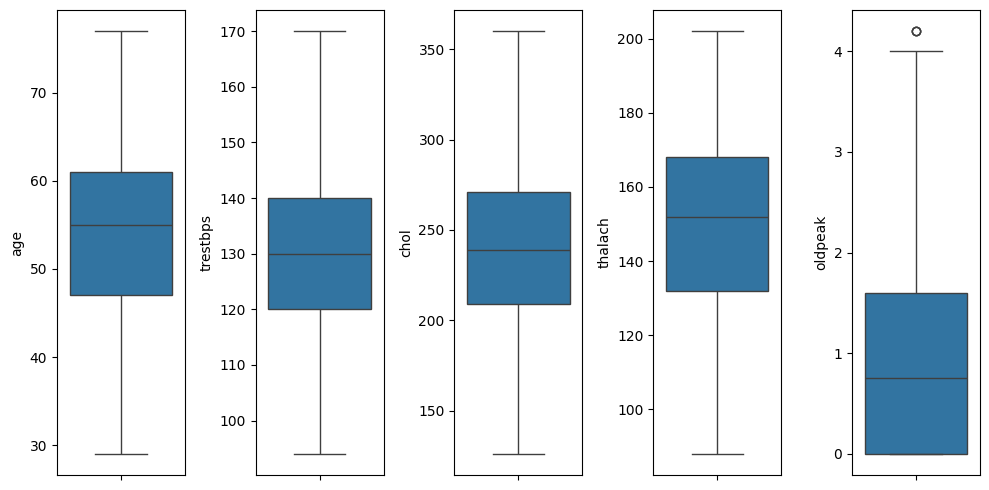

In [ ]:
data_outliers = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(data_outliers)):
    plt.subplot(1,len(data_outliers),i+1)
    sns.boxplot(y=data[data_outliers[i]])
    plt.tight_layout()

**Unique Atribut**

In [ ]:
data_unique = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'Heart_Disease']
for i in range(0,len(data_unique)):
  print("{0}".format(data_unique[i]),data[data_unique[i]].unique())

sex [1 0]
cp [0 1 2 3]
fbs [0 1]
restecg [1 0 2]
exang [0 1]
slope [2 0 1]
ca [2 0 1 3 4]
thal [3 2 0 1]
Heart_Disease [0 1]


In [ ]:
data.loc[data['ca']== 4]

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
52,52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
#hapus data
data.drop(data.loc[data['ca']== 4].index,inplace=True)
data.drop(data.loc[data['thal'] == 0].index,inplace=True)

In [ ]:
data.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,516.001065,54.231097,0.710330,0.956337,129.892439,243.092652,0.137380,0.518637,149.370607,0.330138,1.006177,1.412141,0.681576,2.325879,0.521832
std,296.468243,9.115397,0.453851,1.032112,15.494690,45.129533,0.344432,0.514630,22.799839,0.470513,1.057456,0.601616,0.922238,0.589786,0.499789
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,259.500000,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,519.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,774.500000,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1024.000000,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,3.000000,3.000000,1.000000


# EDA

Age max: 77  min: 29


<ipython-input-20-291d4bd26be1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],kde=False,bins=10)


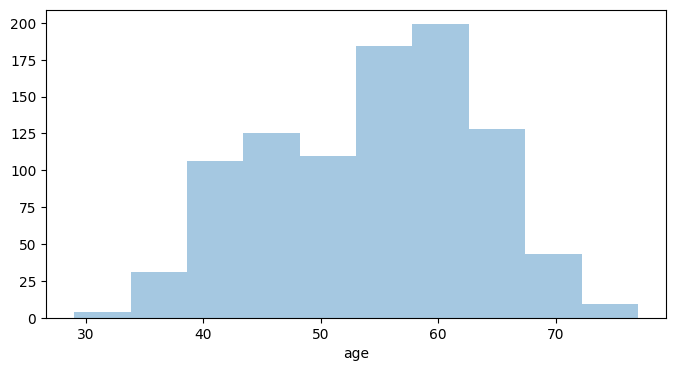

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(data['age'],kde=False,bins=10)
print ("Age max:", data['age'].max(), " min:", data['age'].min())

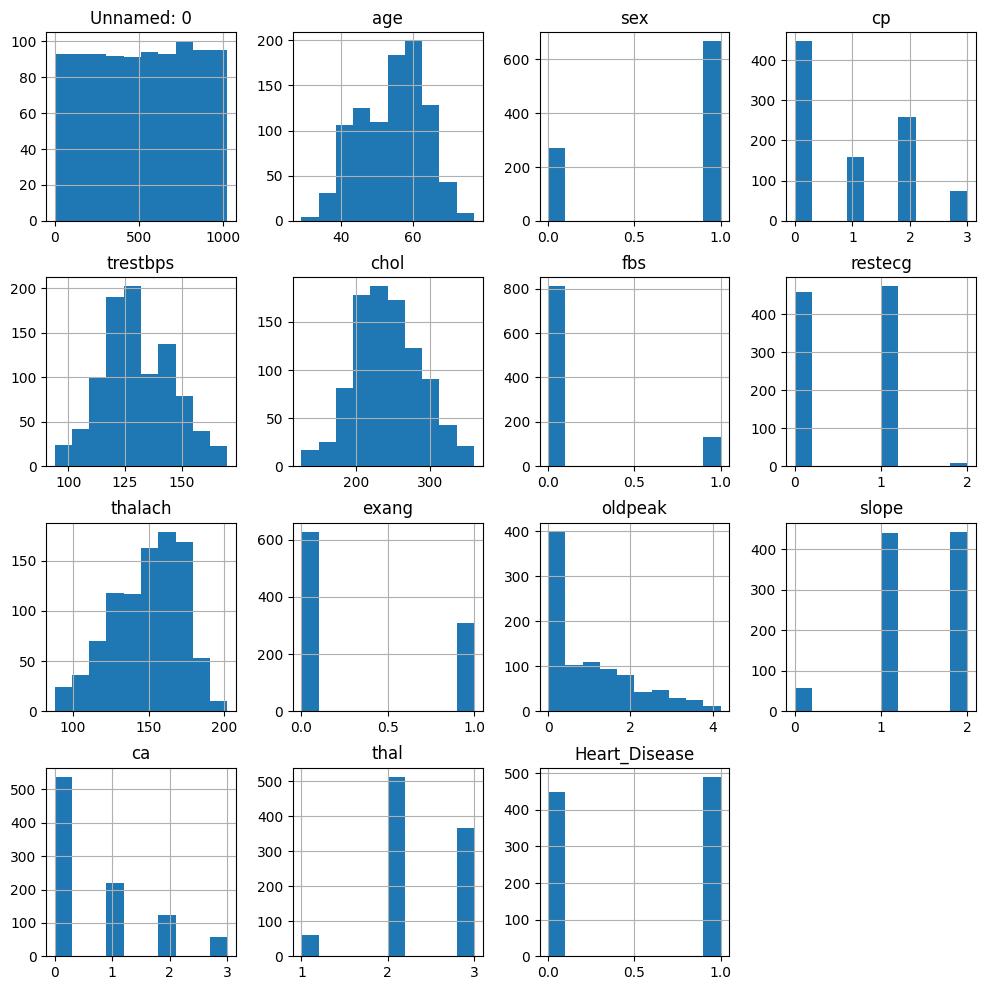

In [ ]:
data.hist(figsize = (12, 12))
plt.show()

In [ ]:
data.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Heart_Disease'],
      dtype='object')

In [ ]:
data_dfcount = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data_dfhisto = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<ipython-input-24-177c2a9c9e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')


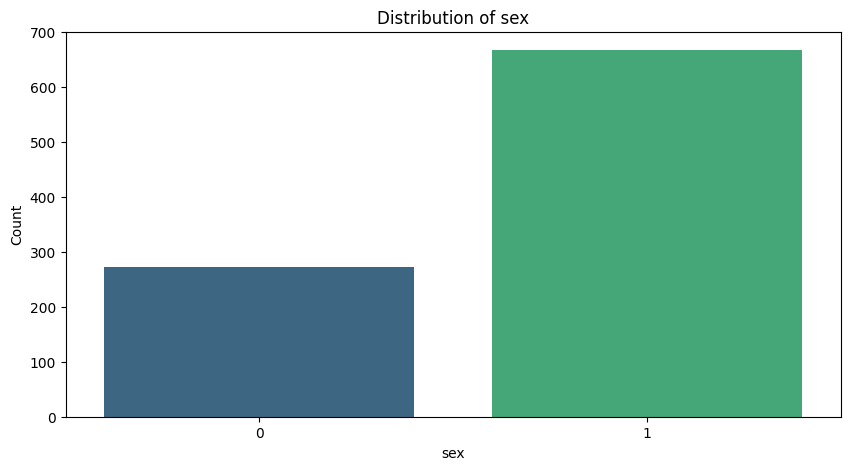

<ipython-input-24-177c2a9c9e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')


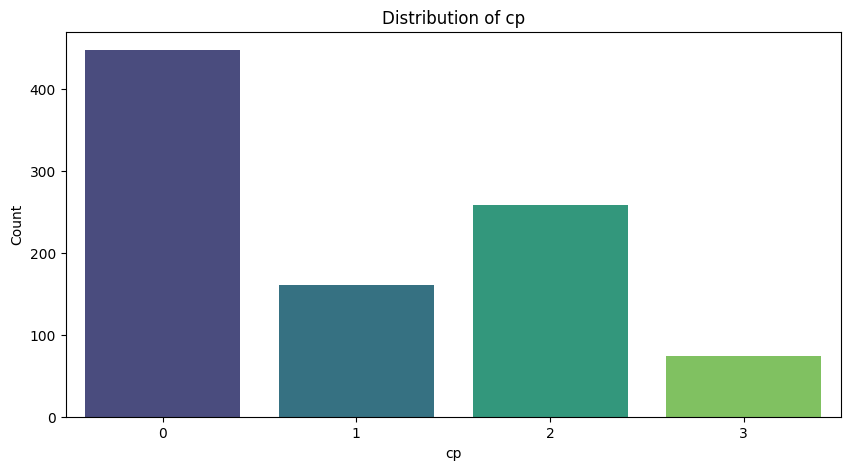

<ipython-input-24-177c2a9c9e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')


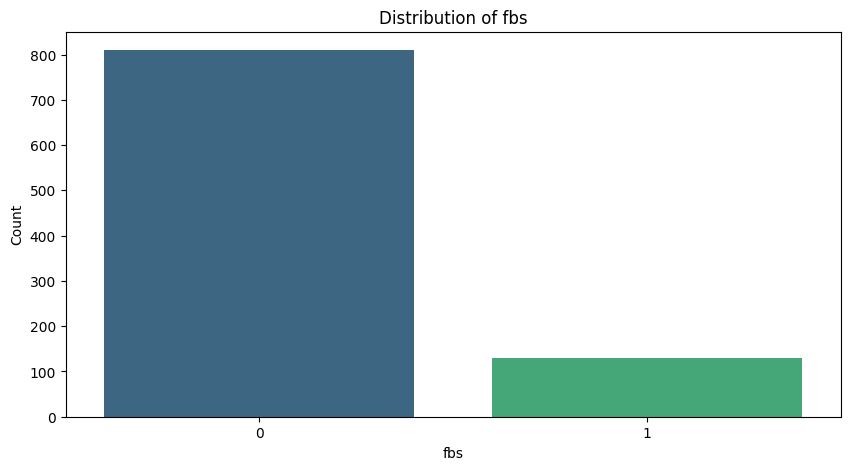

<ipython-input-24-177c2a9c9e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')


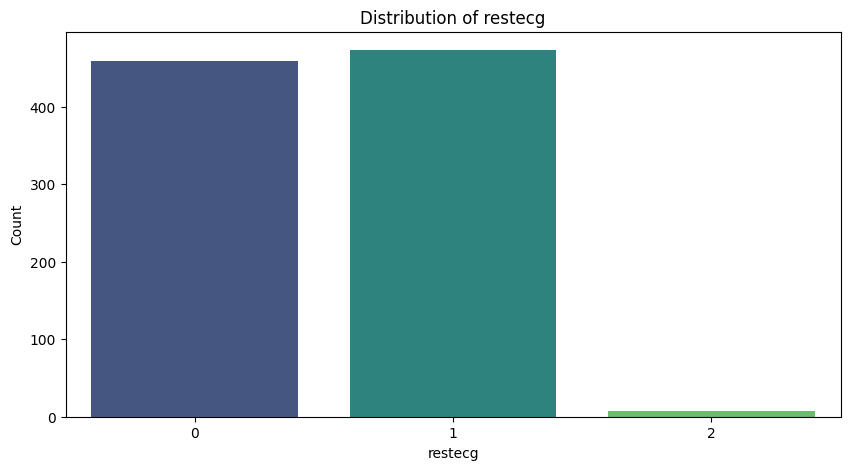

<ipython-input-24-177c2a9c9e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')


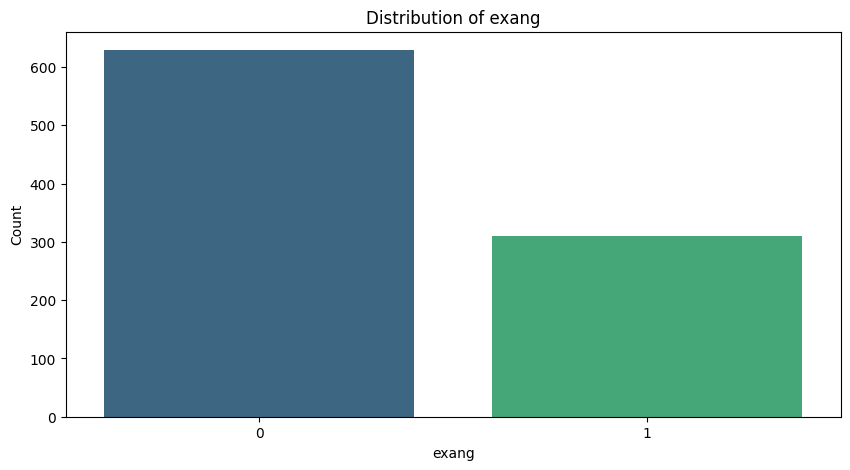

<ipython-input-24-177c2a9c9e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')


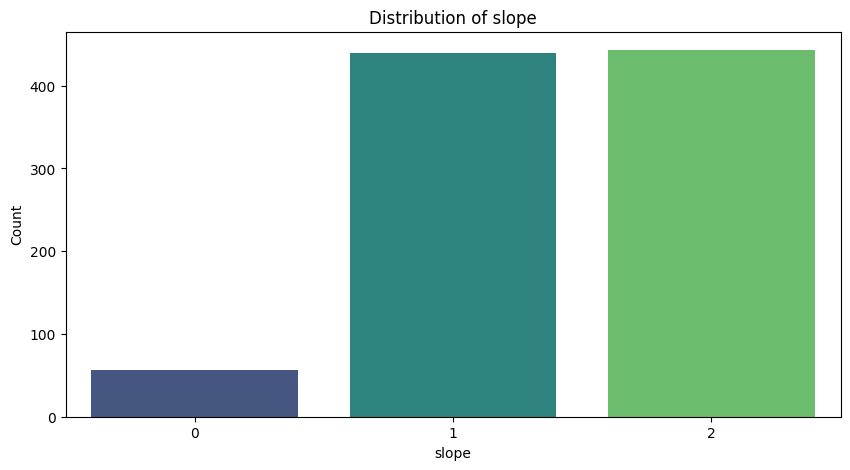

<ipython-input-24-177c2a9c9e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')


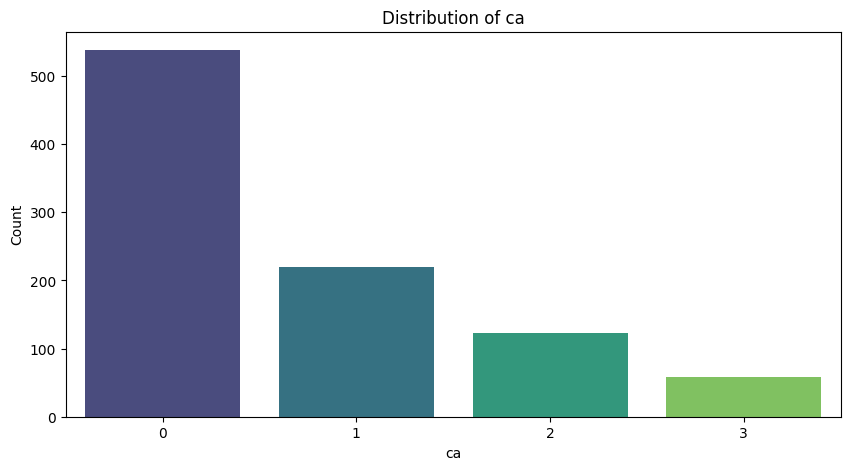

<ipython-input-24-177c2a9c9e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')


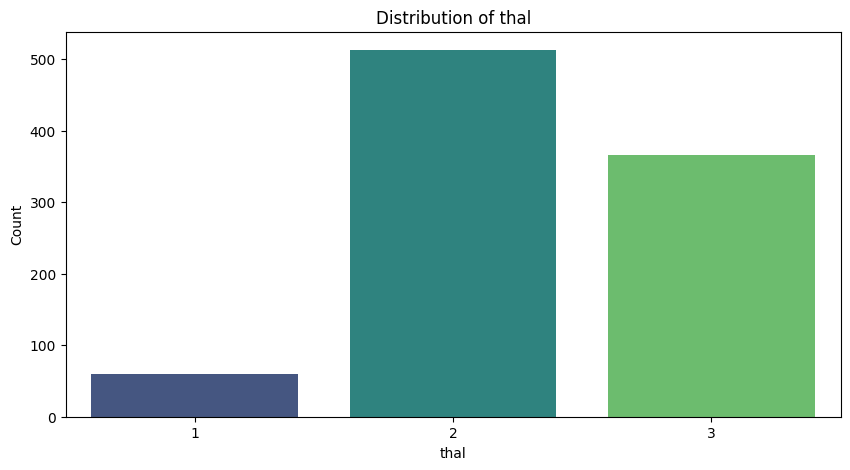

In [ ]:
for column in data_dfcount:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[column], palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


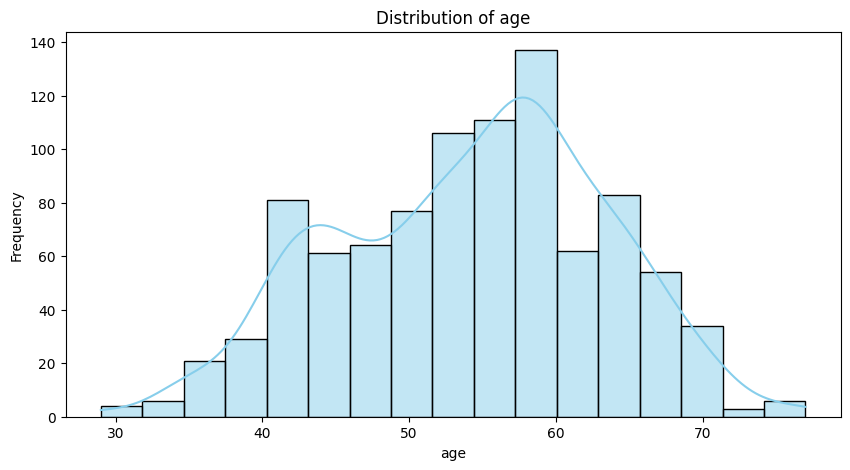

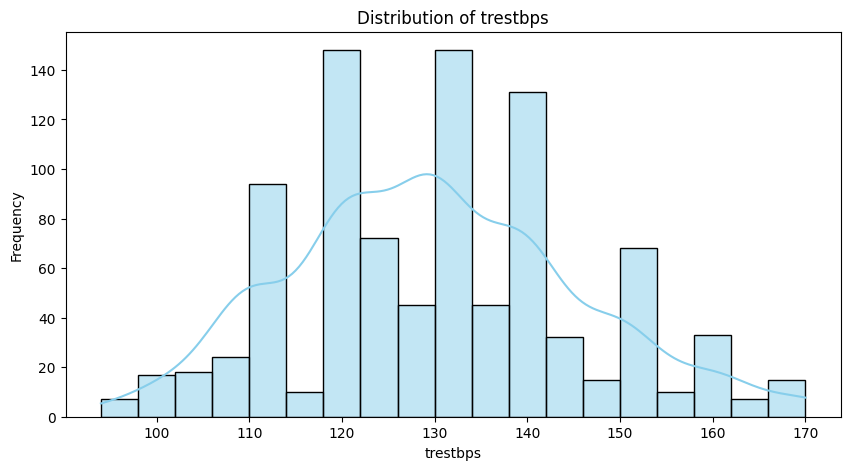

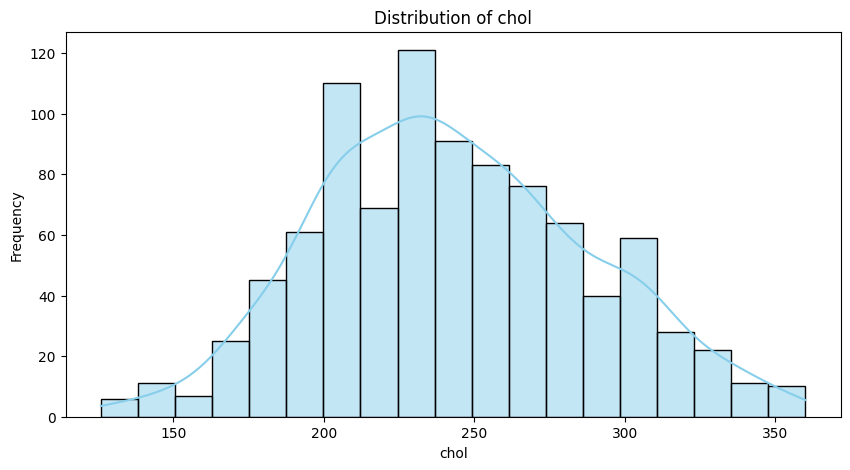

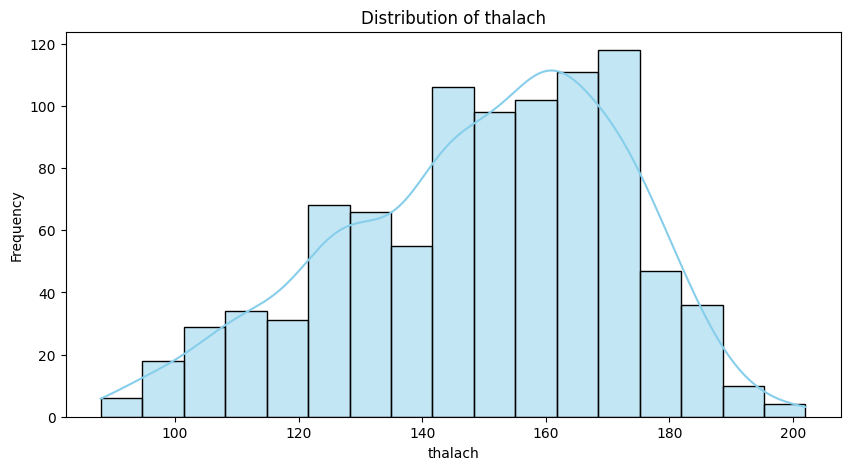

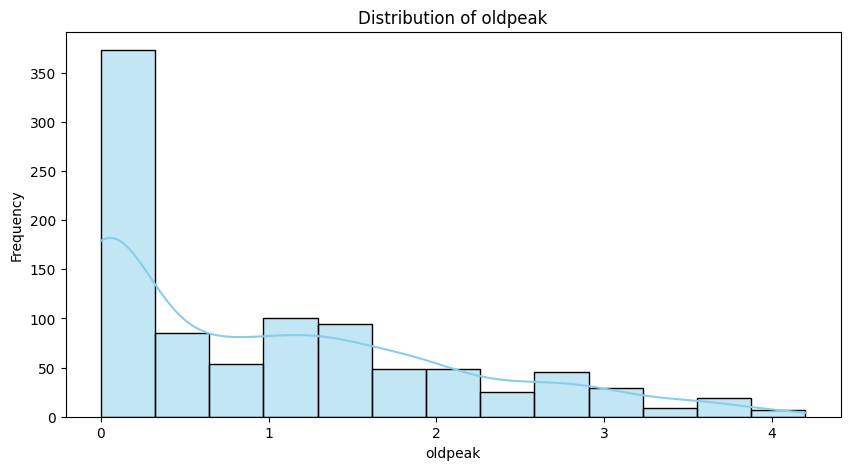

In [ ]:
for column in data_dfhisto:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

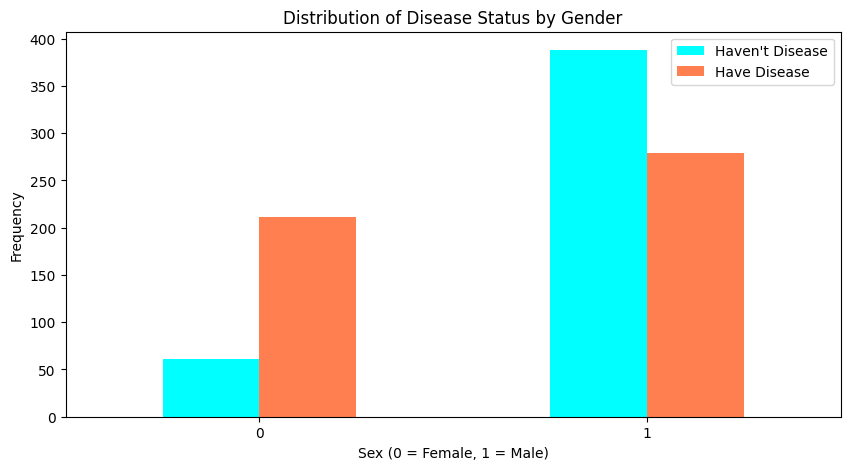

In [ ]:
cross_tab = pd.crosstab(data['sex'], data['Heart_Disease'])

# Plotting
cross_tab.plot(kind="bar", figsize=(10, 5), color=['cyan', 'coral'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.title('Distribution of Disease Status by Gender')
plt.show()

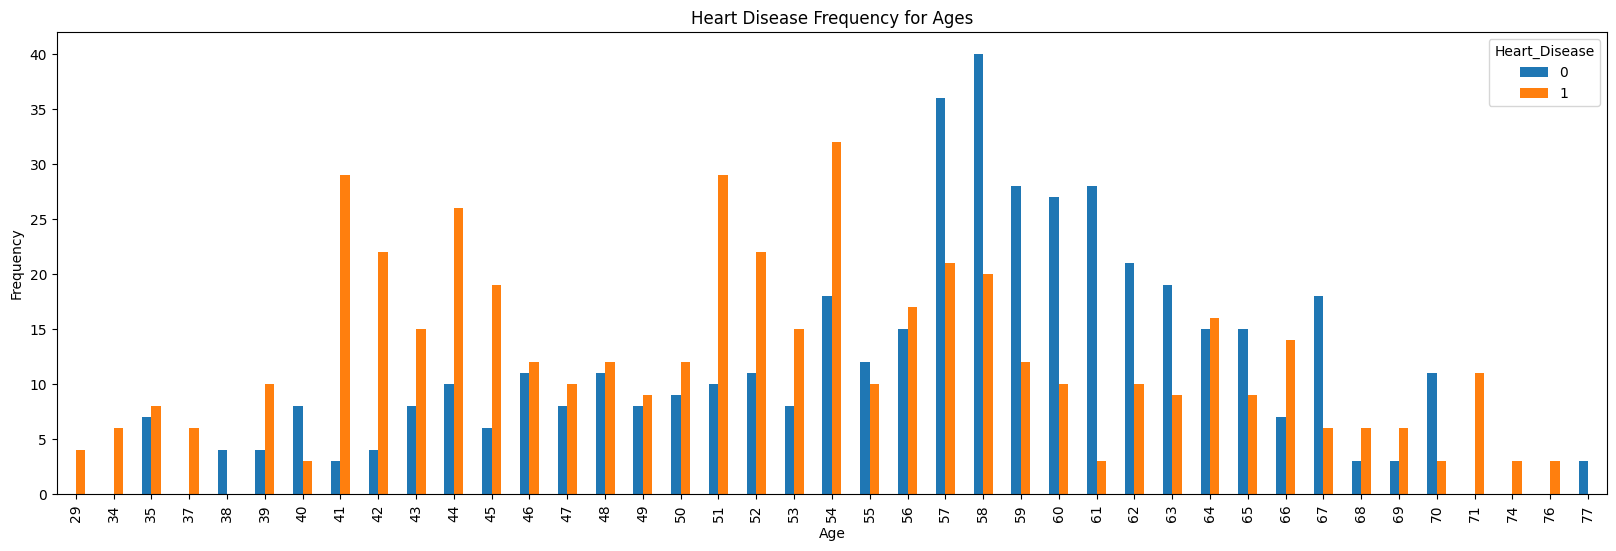

In [ ]:
pd.crosstab(data.age,data.Heart_Disease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
age_unique=sorted(data.age.unique())
age_thalach_values = data.groupby('age')['thalach'].count().values
mean_thalach = []
for i,age in enumerate(age_unique):
  mean_thalach.append(sum(data[data['age'] == age].thalach)/age_thalach_values[i])


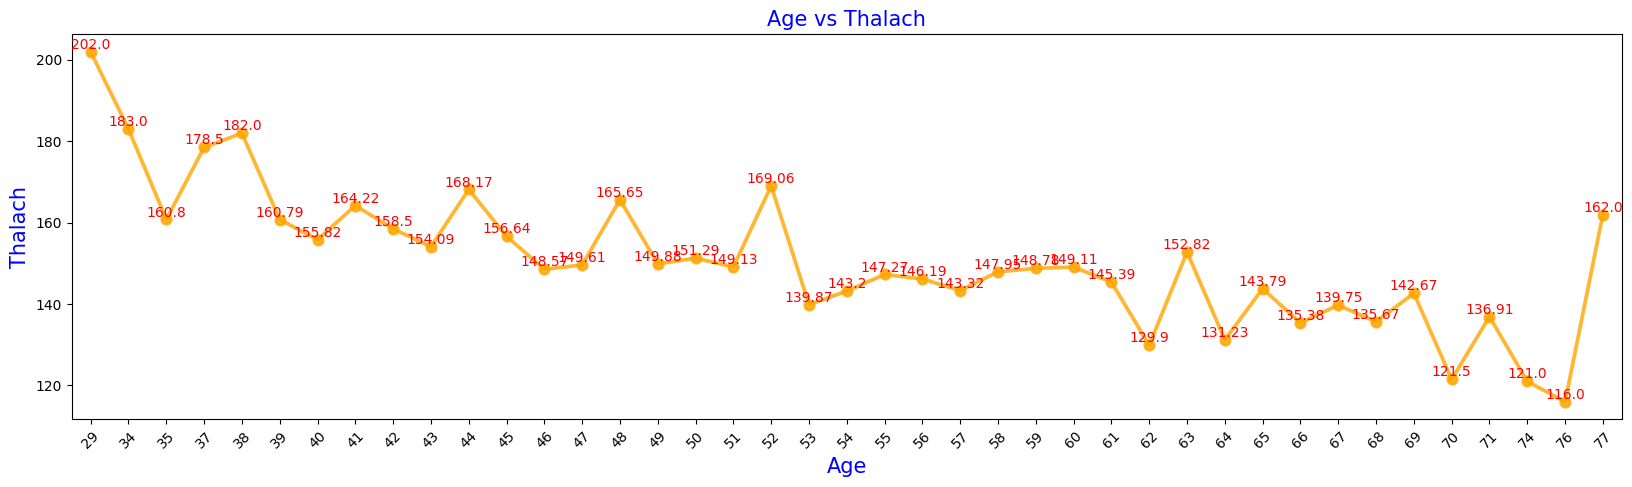

In [ ]:
plt.figure(figsize=(20,5))
sns.pointplot(x= age_unique, y = mean_thalach, color='orange',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')

for i in range(len(age_unique)):
    plt.text(i, mean_thalach[i], round(mean_thalach[i], 2), ha='center', va='bottom', color='red')

plt.show()

In [ ]:
age_unique=sorted(data.age.unique())
age_cp_values = data.groupby('age')['cp'].count().values
mean_cp = []
for i,age in enumerate(age_unique):
  mean_cp.append(sum(data[data['age'] == age].cp)/age_cp_values[i])


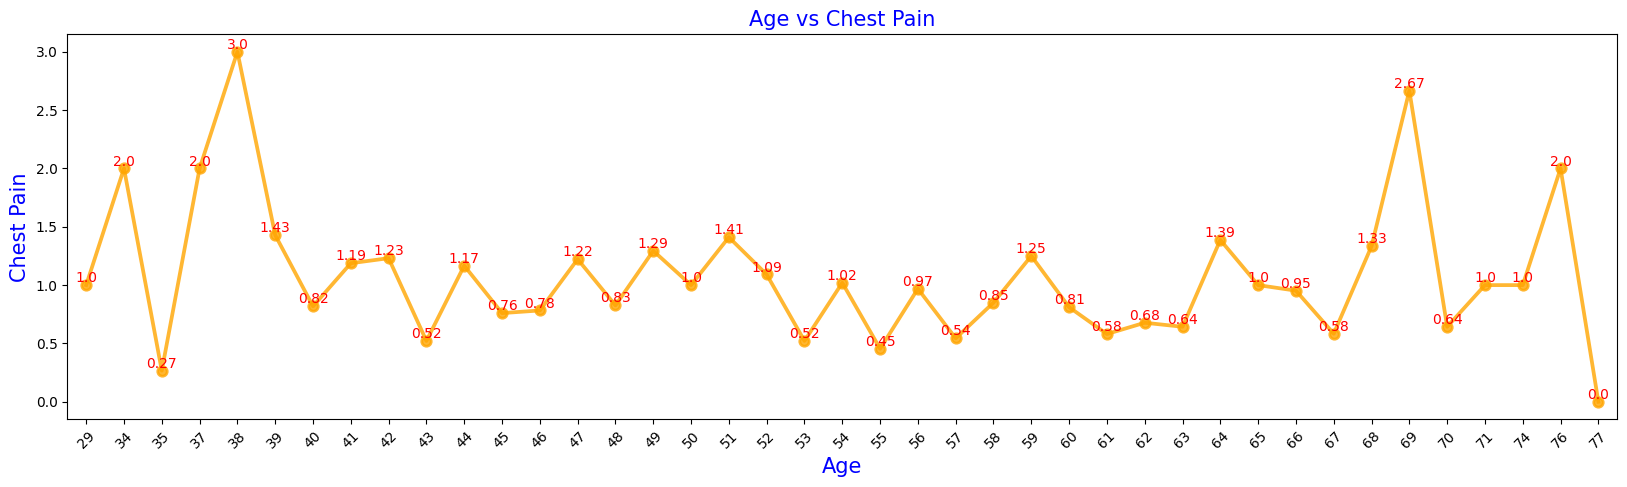

In [ ]:
plt.figure(figsize=(20,5))
sns.pointplot(x= age_unique, y = mean_cp, color='orange',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Chest Pain',fontsize = 15,color='blue')
plt.title('Age vs Chest Pain',fontsize = 15,color='blue')

for i in range(len(age_unique)):
    plt.text(i, mean_cp[i], round(mean_cp[i], 2), ha='center', va='bottom', color='red')
plt.show()

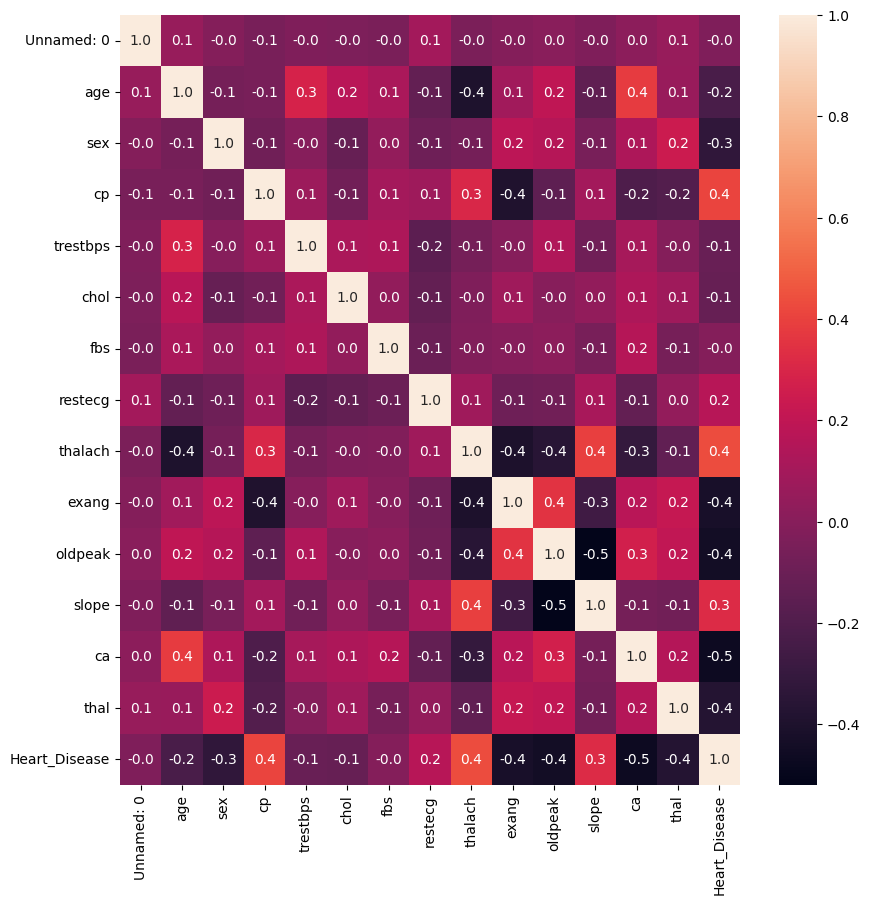

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

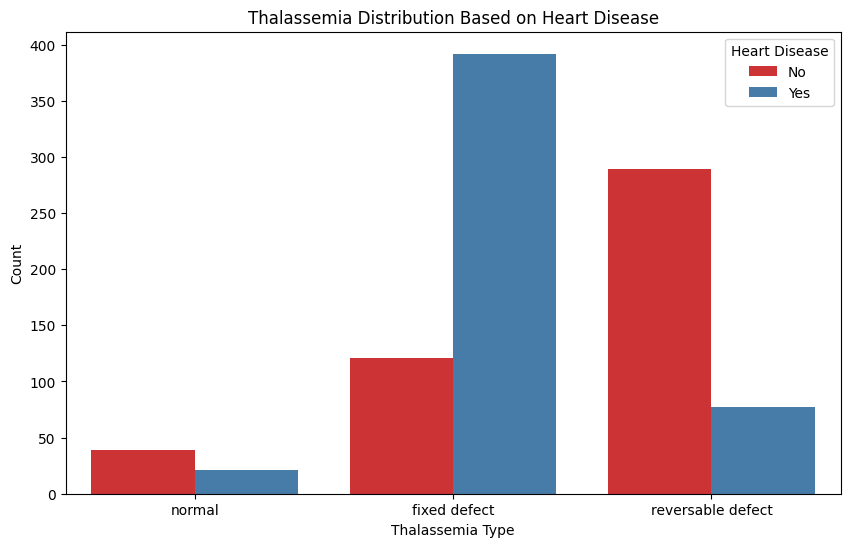

In [ ]:
thal_labels = {
    2: 'fixed defect',
    1: 'normal',
    3: 'reversable defect'
}

# Creating a new column for labeled thal values
data['thal_label'] = data['thal'].map(thal_labels)

# Plotting the distribution of thal values based on Heart Disease presence
plt.figure(figsize=(10, 6))
sns.countplot(x='thal_label', hue='Heart_Disease', data=data, palette='Set1', order=['normal', 'fixed defect', 'reversable defect'])

# Setting plot labels and title
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.title('Thalassemia Distribution Based on Heart Disease')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Display the plot
plt.show()

Thalassemia fixed defect sangat terkait dengan keberadaan penyakit jantung,

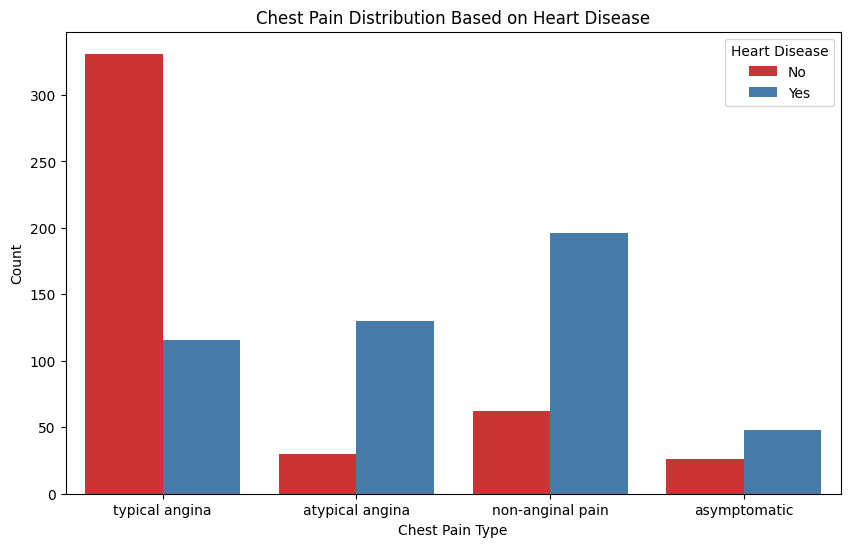

In [ ]:
cp_labels = {
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
}

# Creating a new column for labeled chest pain types
data['cp_label'] = data['cp'].map(cp_labels)

# Plotting the distribution of chest pain types based on Heart Disease presence
plt.figure(figsize=(10, 6))
sns.countplot(x='cp_label', hue='Heart_Disease', data=data, palette='Set1')

# Setting plot labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Distribution Based on Heart Disease')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Display the plot
plt.show()

Non-anginal chest pain sangat terkait dengan keberadaan penyakit jantung

# Training & Modelling


###Normalization and Splitting Train & Test Data

Normalization Numerical Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extracting only the columns that need to be normalized
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Applying Min-Max normalization to selected columns
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [ ]:
data.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
0,0,0.479167,1,0,0.407895,0.367521,0,1,0.701754,0,0.238095,2,2,3,0
1,1,0.500000,1,0,0.605263,0.329060,1,0,0.587719,1,0.738095,0,0,3,0
2,2,0.854167,1,0,0.671053,0.205128,0,1,0.324561,1,0.619048,0,0,3,0
3,3,0.666667,1,0,0.710526,0.329060,0,1,0.640351,0,0.000000,2,1,3,0
4,4,0.687500,0,0,0.578947,0.717949,1,1,0.157895,0,0.452381,1,3,2,0


In [ ]:
X = np.array(data.drop('Heart_Disease', axis=1))
y = np.array(data['Heart_Disease'])

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [ ]:
X[0]

array([-1.74142107, -0.24489179,  0.63858915, -0.9270757 , -0.31591764,
       -0.68933177, -0.399073  ,  0.93585592,  0.81751984, -0.70202976,
       -0.00584429,  0.97765443,  1.43035293,  1.14360204])

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])


(751, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
X_train[0]

array([ 0.57709406,  0.41368594,  0.63858915, -0.9270757 , -0.31591764,
        1.26164998, -0.399073  , -1.00832264,  0.94916984, -0.70202976,
       -0.95201397,  0.97765443,  1.43035293,  1.14360204])

###Create Neural Network

####Categorical Classification

In [ ]:
pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

batch_size = [50, 100, 1000]
epochs = [10, 20]


def create_model( epochs=epochs, batch_size=batch_size):
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=14, kernel_initializer='normal', activation='relu'))  # First layer (Input + Dense)
    model.add(Dense(2, activation='softmax'))  # Second layer (Output) dengan activation 'sigmoid'

    # compile model
    adam = Adam(learning_rate=0.001)  # Correct parameter name is learning_rate
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class classification
    return model

model_GridSearch = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
param_opt = dict(batch_size=batch_size, epochs=epochs)

In [ ]:
grid = GridSearchCV(estimator=model_GridSearch, param_grid=param_opt, n_jobs=1, cv=3, verbose = 0)
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

In [ ]:
print('according to gridsearch the best parameters are : ')
print('batch_size : ' + str(grid_result.best_params_['batch_size']))
print('epochs : ' + str(grid_result.best_params_['epochs']))

according to gridsearch the best parameters are : 
batch_size : 50
epochs : 20


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=14, kernel_initializer='normal', activation='relu'))  # First layer (Input + Dense)
    model.add(Dense(2, activation='softmax'))  # Second layer (Output) dengan activation 'sigmoid'

    # compile model
    adam = Adam(learning_rate=0.001)  # Correct parameter name is learning_rate
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class classification
    return model

model1 = create_model()
print(model1.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 16)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 274 (1.07 KB)

 Trainable params: 274 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history=model1.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=20)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6597 - loss: 0.6501 - val_accuracy: 0.7660 - val_loss: 0.5619
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8064 - loss: 0.5057 - val_accuracy: 0.8032 - val_loss: 0.4687
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8317 - loss: 0.4133 - val_accuracy: 0.8085 - val_loss: 0.4218
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8616 - loss: 0.3462 - val_accuracy: 0.8085 - val_loss: 0.3990
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8731 - loss: 0.3243 - val_accuracy: 0.8191 - val_loss: 0.3885
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8747 - loss: 0.2897 - val_accuracy: 0.8138 - val_loss: 0.3820
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8810 - loss: 0.2949 - val_accuracy: 0.8298 - val_loss: 0.3741
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.2953 - val_accuracy: 0.8245 - val_loss

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model1.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Results for Categorical Model
0.8776595744680851
              precision    recall  f1-score   support

           0       0.91      0.82      0.87        90
           1       0.85      0.93      0.89        98

    accuracy                           0.88       188
   macro avg       0.88      0.88      0.88       188
weighted avg       0.88      0.88      0.88       188



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


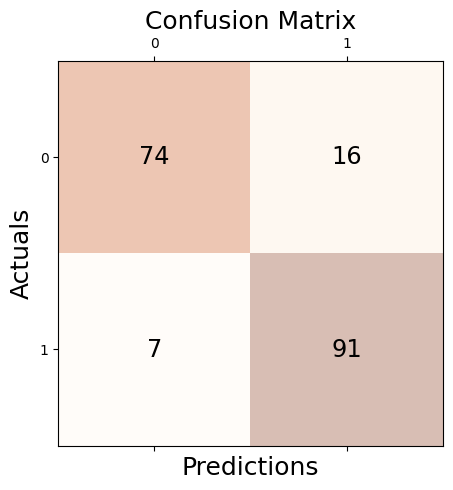

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(X_test)  # Menggunakan y_pred, bukan y_test yang sebelumnya telah digunakan
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


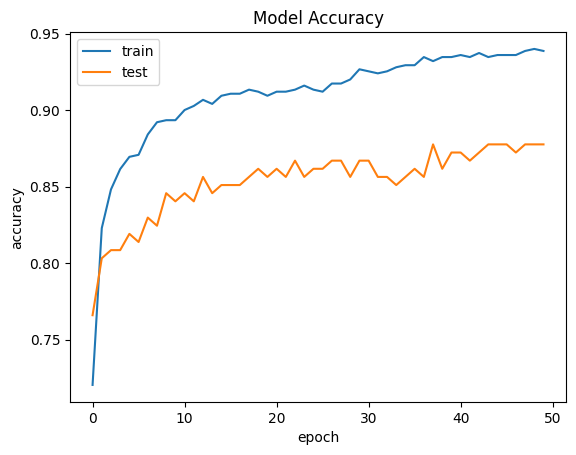

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

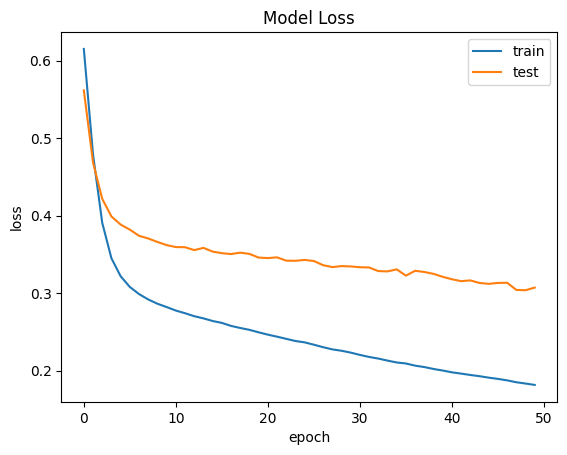

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()